# Pipeline
## Detección de rostros
1. Reproducir código de Santiago para detectar caras
2. Separar rectangulo de cara identificada
## Identificación de tapabocas
**Posibilidades**:
- umbralización, superpixeles
- Detectar bordes?
- Extraer metricas

## Opción 3. Use un proyecto anterior de la asignatura de aprendizaje de máquina (con Alex)

Algunos de ustedes, me han comentado acerca de dos proyectos de la asignatura de machine learning.  Uno es la detección de cuando una persona tiene tapabocas y cuando no. El otro es la detección y localización de los ojos en una imagen. Puede escoger cualquiera de estos dos proyectos, pero la idea aquí no es partir directamente de la imagen sino utilizar técnicas de procesamiento de imágenes y visión por computador (no deep learning) en combinación con métodos de machine learning (no necesariamente redes neuronales).  Tendrá que involucrar:

- Técnicas de preprocesado y postprocesado (si segmenta)
- Técnicas de segmentación y/o detección
- Es **obligatorio** extraer descriptores, ya sean locales o de toda la imagen (cuidado con la invarianza).
- Usar un pipeline de machine learning, involucrando diversas etapas y modelos (random forest, LDA, regresión logística, NN, etc) y escoger el mejor modelo. No olvide, evaluar sus resultados en un training y test sets.

Puede serle muy útil emplear un algoritmo de detección de rostros como "Viola-Jones". En un taller de MACC lo expliqué de forma muy sencilla ([en este video](https://youtu.be/0haEygYdHrw?list=PL0vATkTNKgo9NIY8oCL-pAfggflwHHA2O&t=1334)). [Este notebook](https://github.com/santialferez/tallerCV/blob/master/TallerCV.ipynb) (hacía el final) tiene un ejemplo sencillo con una foto mía de hace tiempo.

Para el problema de clasificación de tapabocas puede serle útil [este dataset](https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/face-mask-dataset.zip) (no use imágenes aumentadas).


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
from copy import deepcopy
from skimage import io
from skimage.color import rgb2gray

# 1. Creación de función para detectar rectangulo de cara

Probaremos la función creada para dos imagenes: con y sin tapabocas

In [2]:
# FUNCIONES AUXILIARES
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


In [3]:
# Primero lectura de imagenes
train_wm = "./face-mask-dataset/Dataset/train/train/without_mask"
train_m = "./face-mask-dataset/Dataset/train/train/with_mask"
#test_wm = "./"
#test = "./"
train_wm_images = load_images(train_wm)
train_m_images = load_images(train_m)

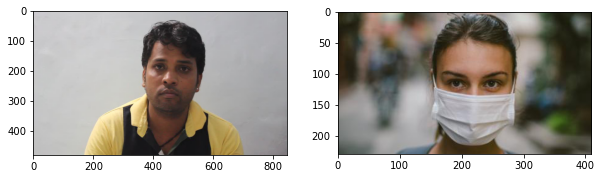

In [4]:
im1 = train_wm_images[0] # sin tapabocas
im2 = train_m_images[0] # con tapabocas
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(im1);
ax[1].imshow(im2);

### Aplicacion del algoritmo de Viola-Jones

In [5]:
#Cargando los clasificadores (en formato XML)
haar_cascades_path = test1 = "C:\\Users\\juanc\\anaconda3\\Lib\\site-packages\\cv2\\data\\"
face_cascade = cv2.CascadeClassifier(haar_cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(haar_cascades_path + 'haarcascade_eye.xml')

In [6]:
gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

In [7]:
# Realiza la deteccion de rostros
faces_1 = face_cascade.detectMultiScale(gray_1, 1.3, 5)
faces_2 = face_cascade.detectMultiScale(gray_2, 1.3, 5)

In [20]:
# Dibuja rectangulos en las caras y ojos
marked_1 = deepcopy(im1)
for (x,y,w,h) in faces_1:
    marked_1 = cv2.rectangle(marked_1,(x,y),(x+w,y+h),(255,0,0),2)
    # Seleccion en escala de grises de la cara
    roi_gray_1 = gray_1[y:y+h, x:x+w]
    # Seleccion a color de la cara
    roi_color_1 = marked_1[y:y+h, x:x+w]

In [21]:
# Dibuja rectangulos en las caras y ojos
marked_2 = deepcopy(im2)
for (x,y,w,h) in faces_2:
    marked_2 = cv2.rectangle(marked_2,(x,y),(x+w,y+h),(255,0,0),2)
    # Seleccion en escala de grises de la cara
    roi_gray_2 = gray_2[y:y+h, x:x+w]
    # Seleccion a color de la cara
    roi_color_2 = marked_2[y:y+h, x:x+w]

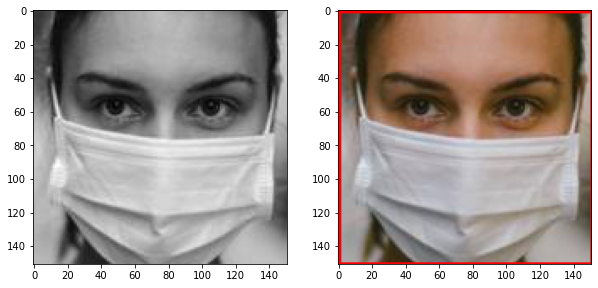

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

#ax[0].imshow(marked_1);
#ax[1].imshow(marked_2);
ax[0].imshow(roi_gray_2, cmap="gray");
ax[1].imshow(roi_color_2);

Ya logramos implementar un codigo que detecte caras (con y sin tapabocas). Hay que confirmar que tan bien funciona aplicandolo al resto de las imágenes.

**Nota:** Hay que eliminar los bordes en rojo de la imagen a color si se utiliza ese recorte para futuro análisis.